<a href="https://colab.research.google.com/github/afeef2003/task-5/blob/main/tasks_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#expolatray data analysis
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df=pd.read_csv('/content/AMZN_stock_data.csv')

In [ ]:
#basic information of data set
print("shape of data:",df.shape)
print("\ncolumn names:",df.columns)
print("\ndatatypes:",df.dtypes)
print("\nfirst five rows:",df.info())

shape of data: (6987, 8)

column names: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

datatypes: Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB

first five rows: None


In [ ]:
#finding missing values
print("\nmissing values:\n",df.isnull().sum())


missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
#stastical summary
print("\nstastical summary:\n",df.describe())


stastical summary:
               Open         High          Low        Close        Volume  \
count  6987.000000  6987.000000  6987.000000  6987.000000  6.987000e+03   
mean     40.692696    41.165619    40.178290    40.685061  1.360552e+08   
std      58.144182    58.787641    57.435304    58.125169  1.375735e+08   
min       0.070313     0.072396     0.065625     0.069792  9.744000e+06   
25%       2.100250     2.148250     2.064250     2.110000  6.298900e+07   
50%       9.041500     9.158500     8.925000     9.021000  1.005360e+08   
75%      72.789249    73.643497    71.504250    73.006500  1.555070e+08   
max     239.020004   242.520004   238.029999   242.059998  2.086584e+09   

       Dividends  Stock Splits  
count     6987.0   6987.000000  
mean         0.0      0.003864  
std          0.0      0.244286  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0     20.000000  


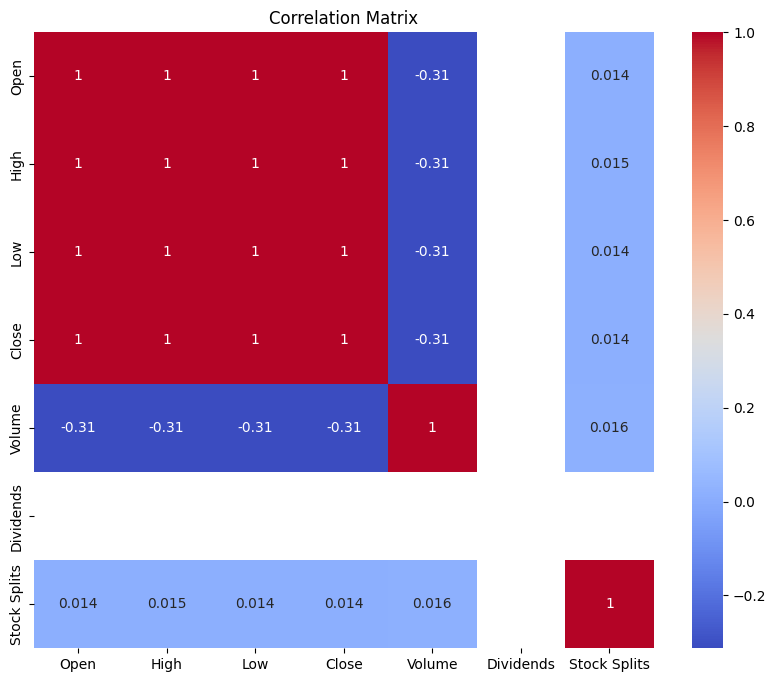

In [ ]:
#correlation matrics(numerical features)
plt.figure(figsize=(10,8))
# Set numeric_only=True to exclude non-numeric columns like 'Date'
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

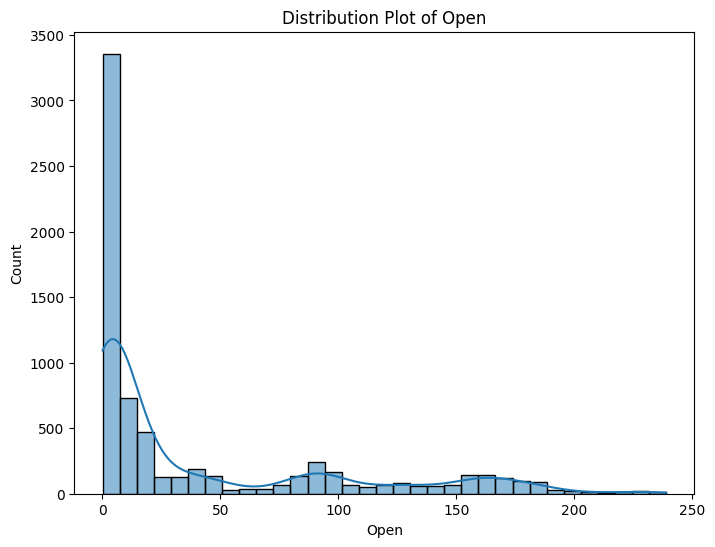

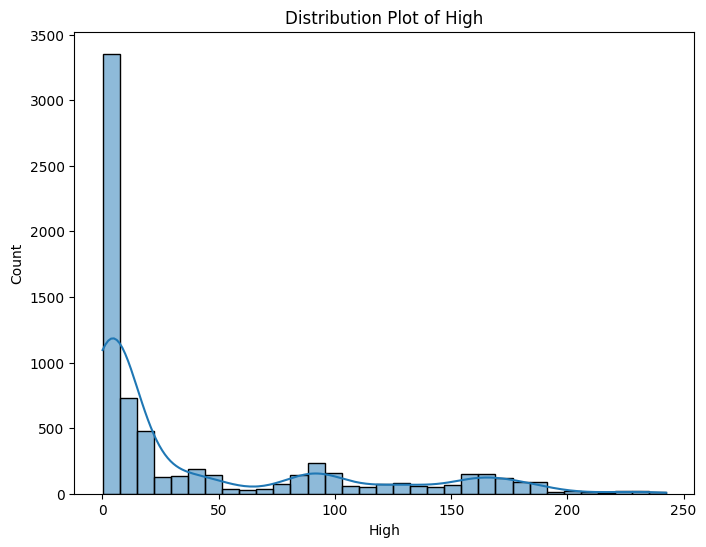

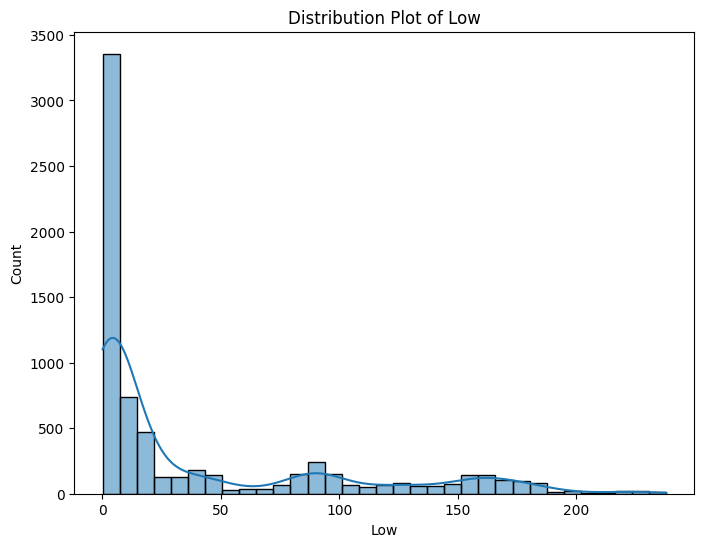

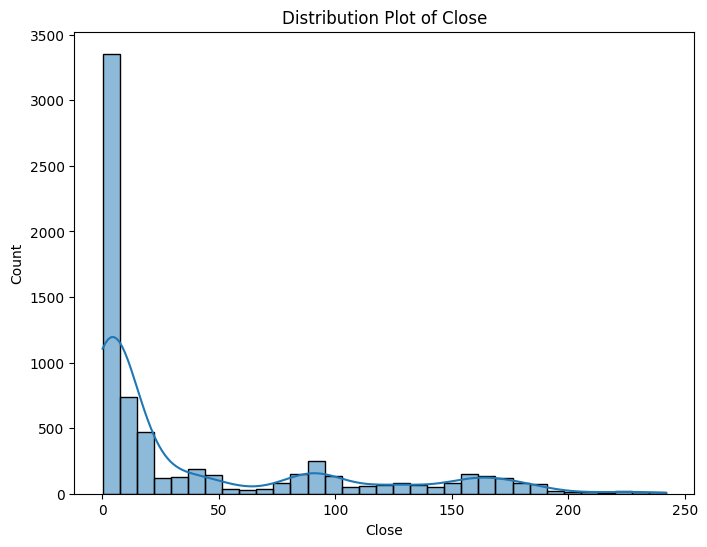

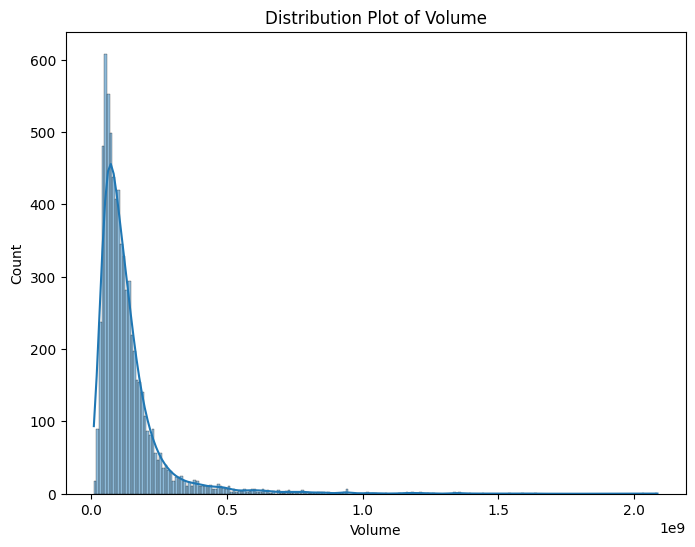

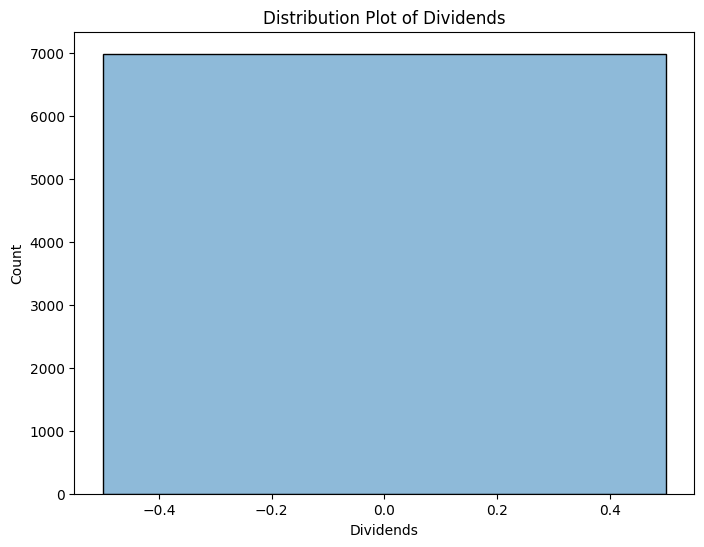

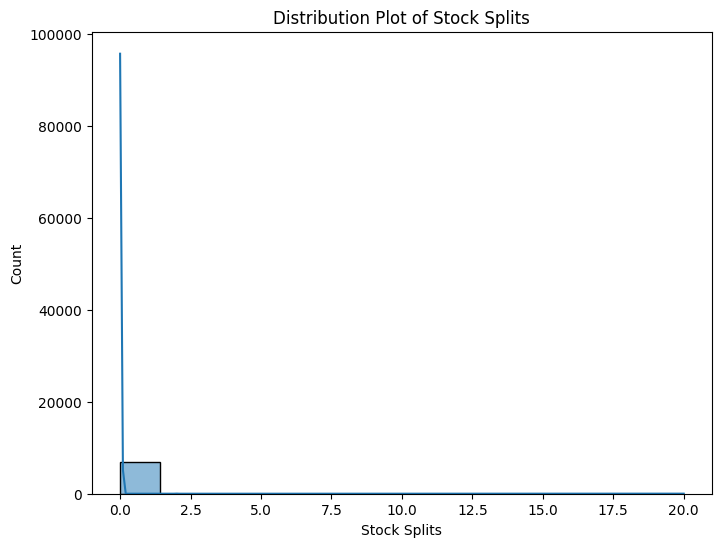

In [ ]:
#distribution plot for numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution Plot of {col}')
    plt.show()

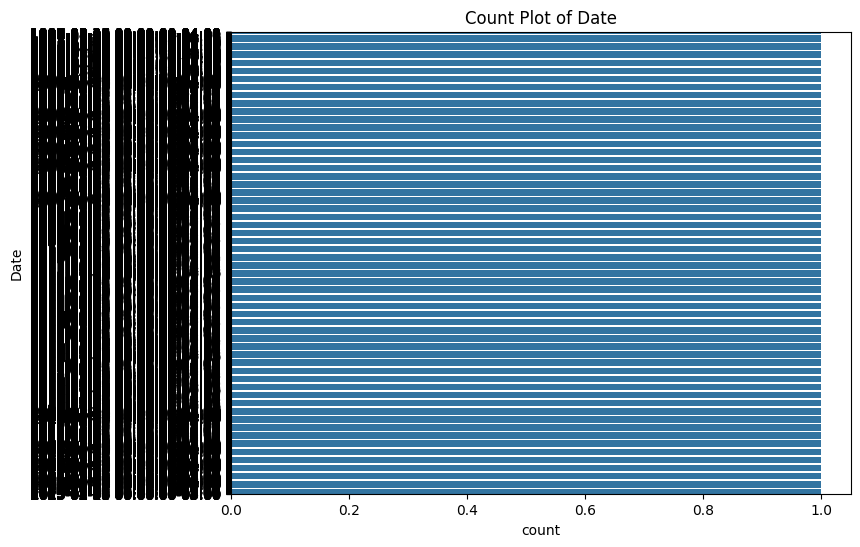

In [ ]:
#count plot for categorical features
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=col,data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df=df.sort_values(by='Date')

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6987 entries, 1997-05-15 00:00:00-04:00 to 2025-02-21 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6987 non-null   float64
 1   High          6987 non-null   float64
 2   Low           6987 non-null   float64
 3   Close         6987 non-null   float64
 4   Volume        6987 non-null   int64  
 5   Dividends     6987 non-null   float64
 6   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.7+ KB


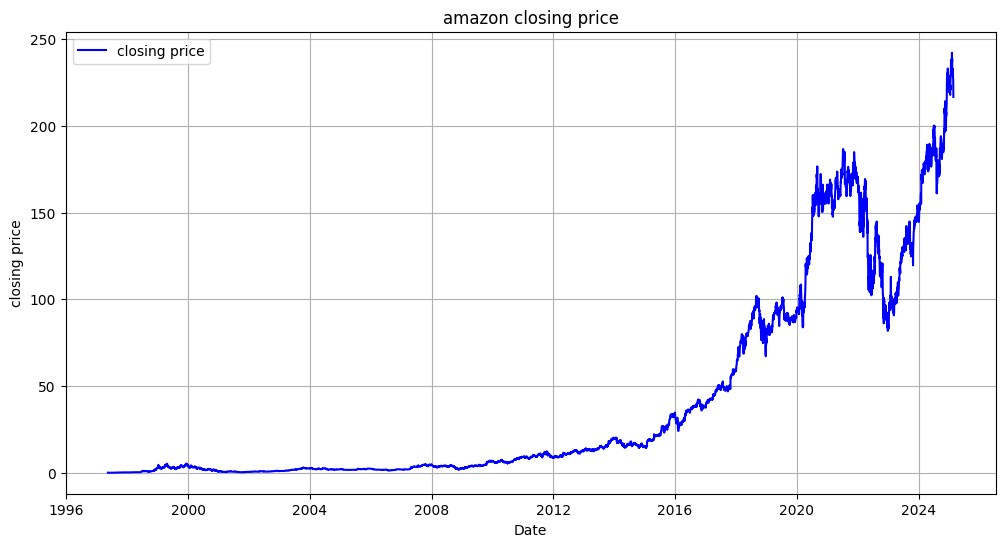

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label='closing price',color='blue')
plt.title('amazon closing price')
plt.xlabel('Date')
plt.ylabel('closing price')
plt.legend()
plt.grid(True)
plt.show()

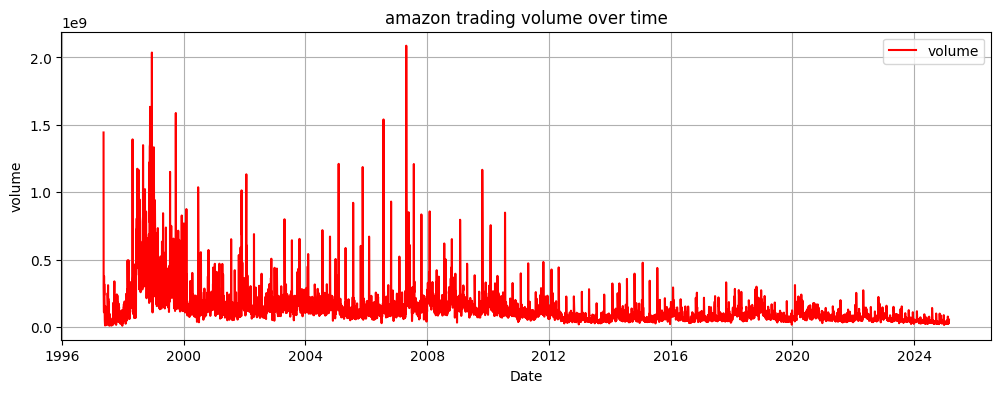

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['Volume'],label='volume',color='red')
plt.title('amazon trading volume over time')
plt.xlabel('Date')
plt.ylabel('volume')
plt.legend()
plt.grid(True)
plt.show()

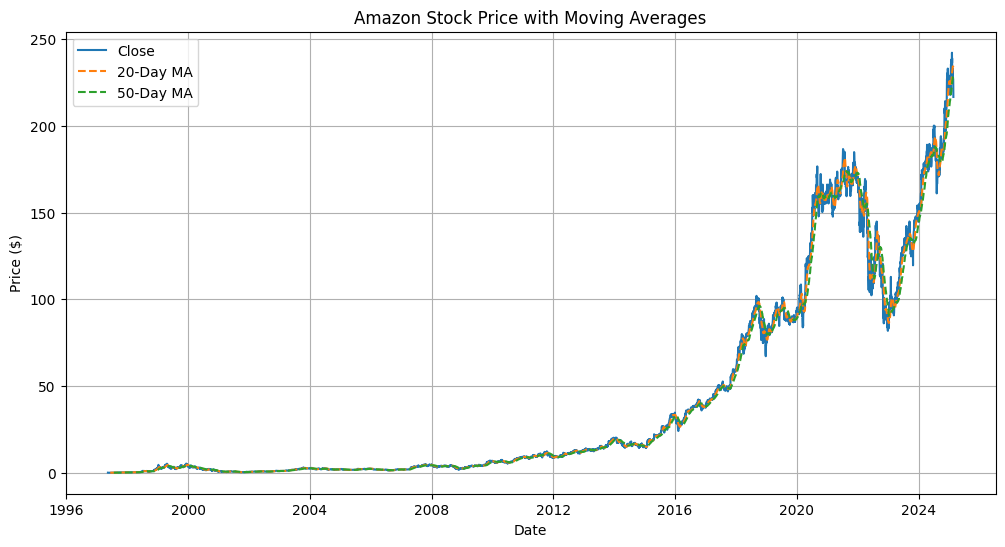

In [ ]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA20'], label='20-Day MA', linestyle='--')
plt.plot(df['MA50'], label='50-Day MA', linestyle='--')
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

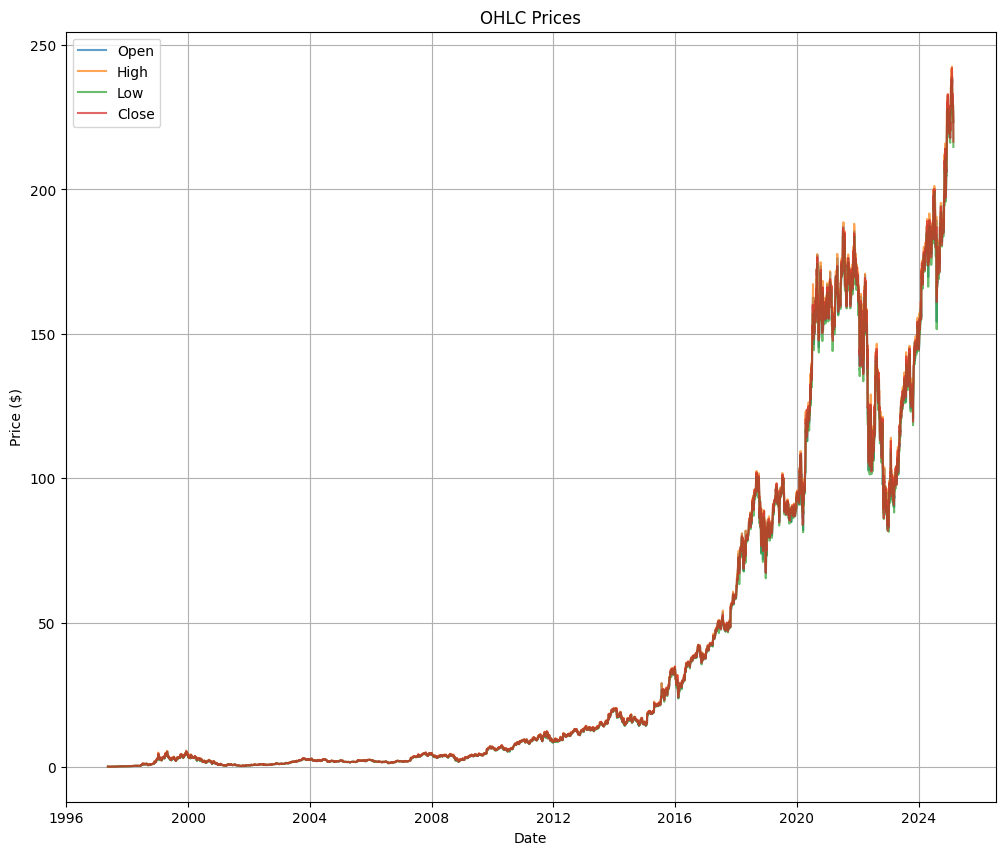

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df['Open'], label='Open', alpha=0.7)
plt.plot(df['High'], label='High', alpha=0.7)
plt.plot(df['Low'], label='Low', alpha=0.7)
plt.plot(df['Close'], label='Close', alpha=0.7)
plt.title('OHLC Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['Daily Return'] = df['Close'].pct_change()

In [ ]:
df['Volatility_10'] = df['Close'].rolling(window=10).std()
df['Volatility_30'] = df['Close'].rolling(window=30).std()

In [ ]:
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()

In [ ]:
df['Close/Open'] = df['Close'] / df['Open']
df['High/Low'] = df['High'] / df['Low']

In [ ]:
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df['Lag_3'] = df['Close'].shift(3)

In [ ]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

In [ ]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = compute_rsi(df['Close'])

In [ ]:
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

In [ ]:
df.dropna(inplace=True)